In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

# T Gate

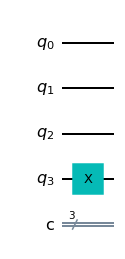

In [3]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

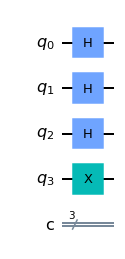

In [4]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

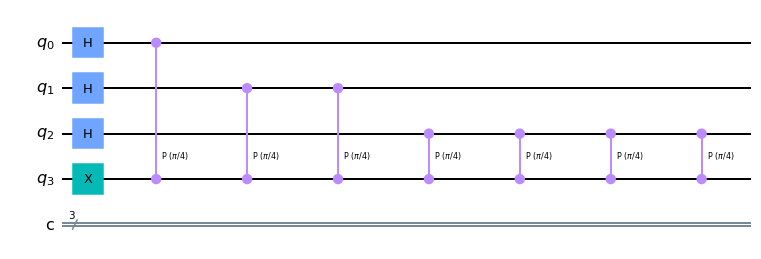

In [5]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw()

In [2]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [7]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

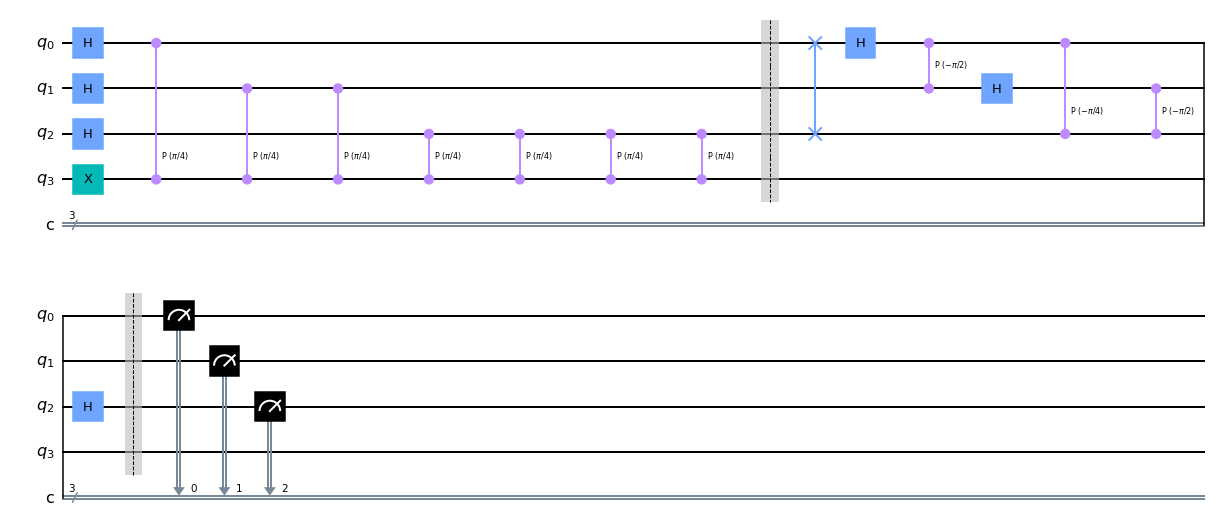

In [8]:
qpe.draw()

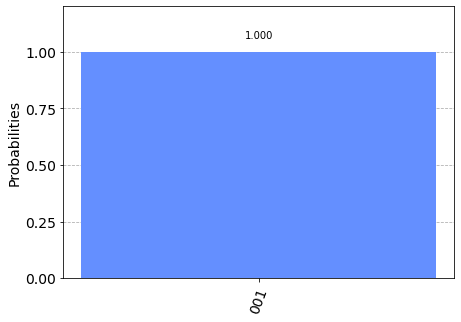

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

# Theta = 1/3

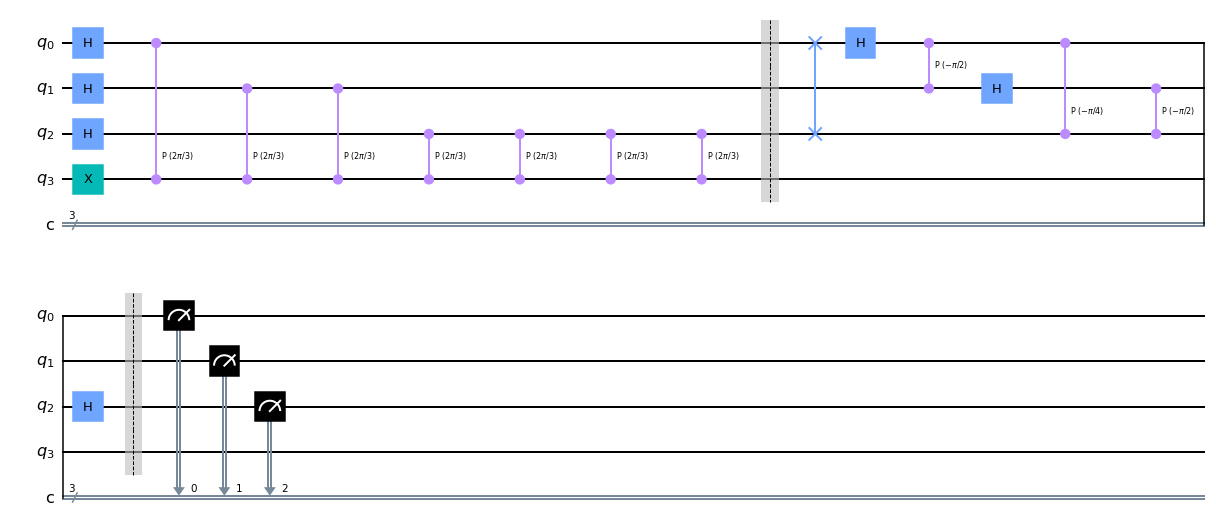

In [11]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

qpe2.barrier()
# Do the inverse QFT:
qft_dagger(qpe2, 3)
qpe2.barrier()

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

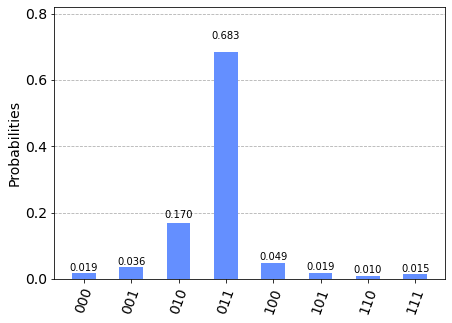

In [12]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

## More precision by adding more counting qubits

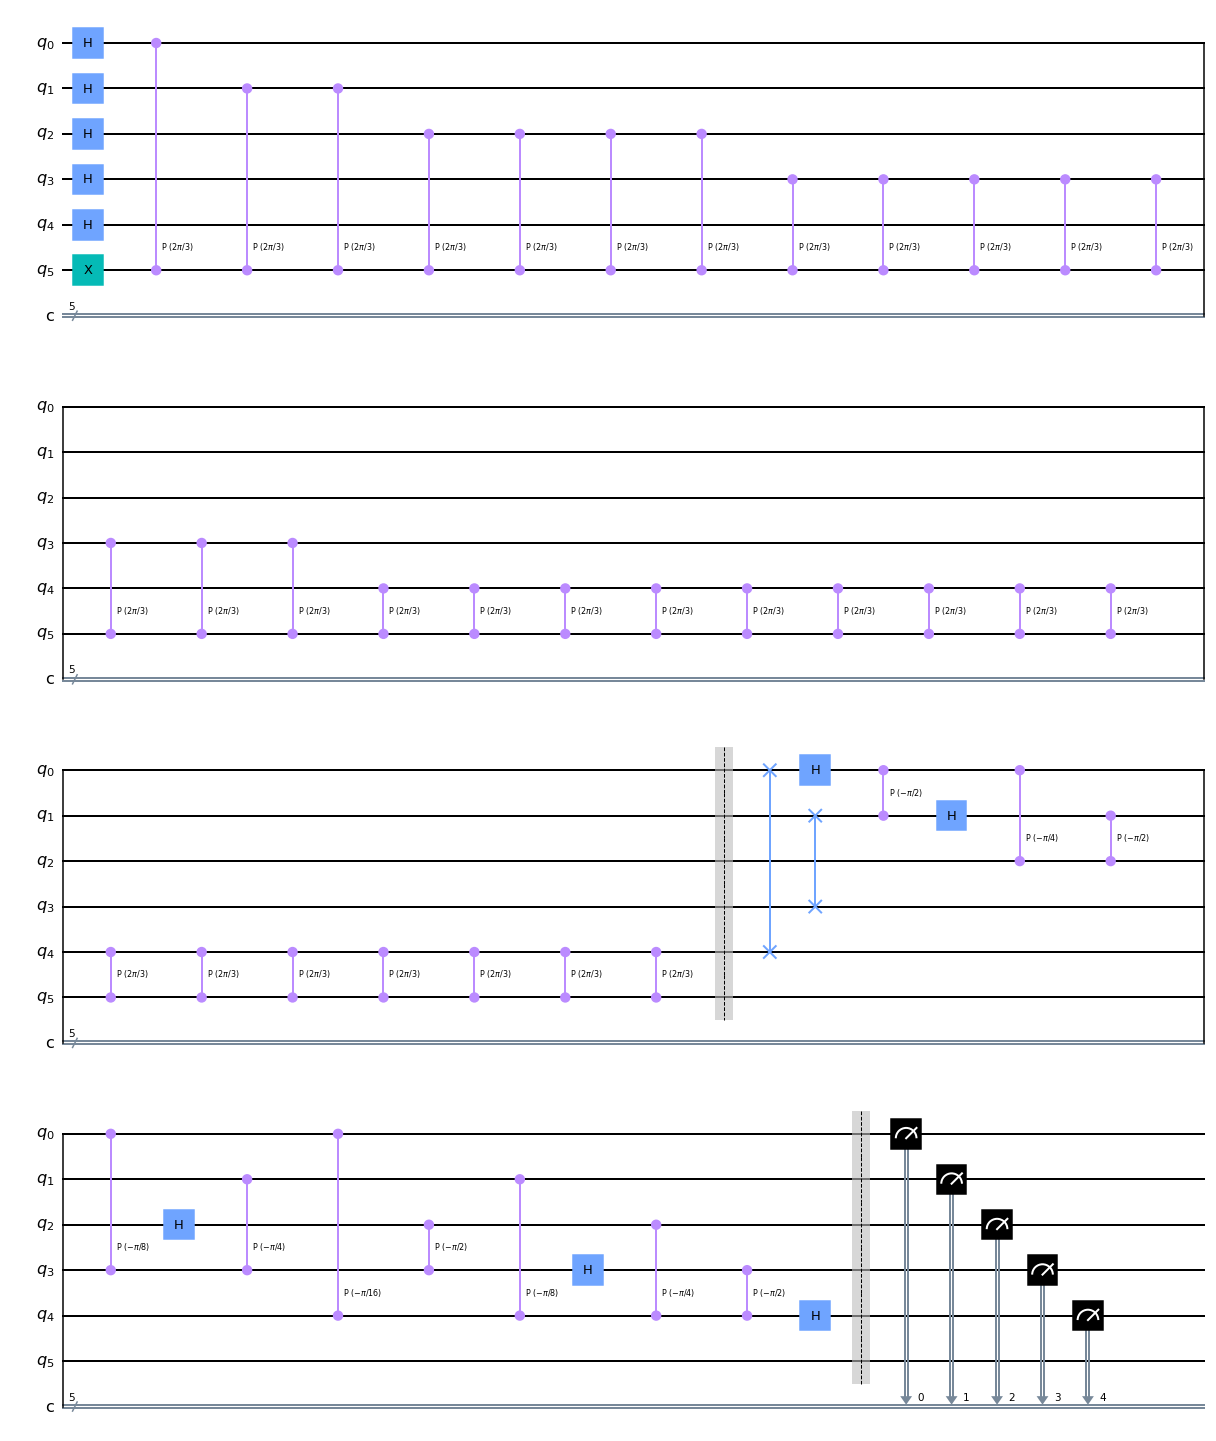

In [13]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

qpe3.barrier()

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

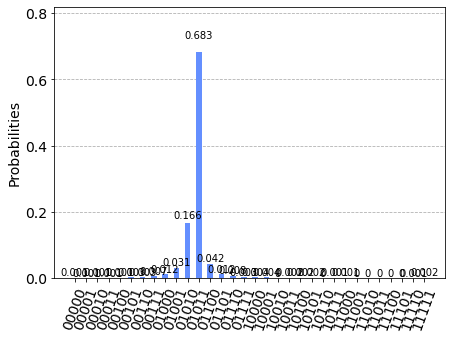

In [14]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, aer_sim)
qobj = assemble(t_qpe3, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

# Real device

In [15]:
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
santiago = provider.get_backend('ibmq_santiago')

# Run with 2048 shots
shots = 2048
t_qpe = transpile(qpe, santiago, optimization_level=3)
job = santiago.run(t_qpe, shots=shots)
job_monitor(job)

ibmqfactory.load_account:WARNING:2021-08-04 16:04:08,502: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


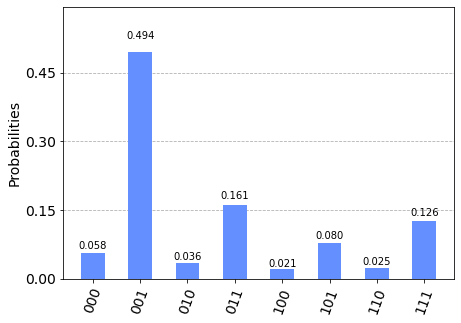

In [16]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)

# Define Create QPE function

In [30]:
def create_qpe(n, angle):
    qpe = QuantumCircuit(n, n-1)
    # Apply H-Gates to counting qubits:
    for qubit in range(n-1):
        qpe.h(qubit)

    # Prepare our eigenstate |psi>:
    qpe.x(n-1)

    # Do the CNOT operations:
    repetitions = 1
    for counting_qubit in range(n-1):
        for i in range(repetitions):
            qpe.cp(angle,counting_qubit, n-1);
        repetitions *= 2

    # Do the inverse QFT:
    qpe.barrier()
    qft_dagger(qpe, n-1)


    # Measure of course!
    qpe.barrier()
    for m in range(n-1):
        qpe.measure(m,m)
    return qpe

# Define measure plot

In [5]:
def obtain_measure(qpe):
    # Let's see the results!
    aer_sim = Aer.get_backend('aer_simulator')
    shots = 4096
    t_qpe = transpile(qpe, aer_sim)
    qobj = assemble(t_qpe, shots=shots)
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()
    return answer

# C NOT

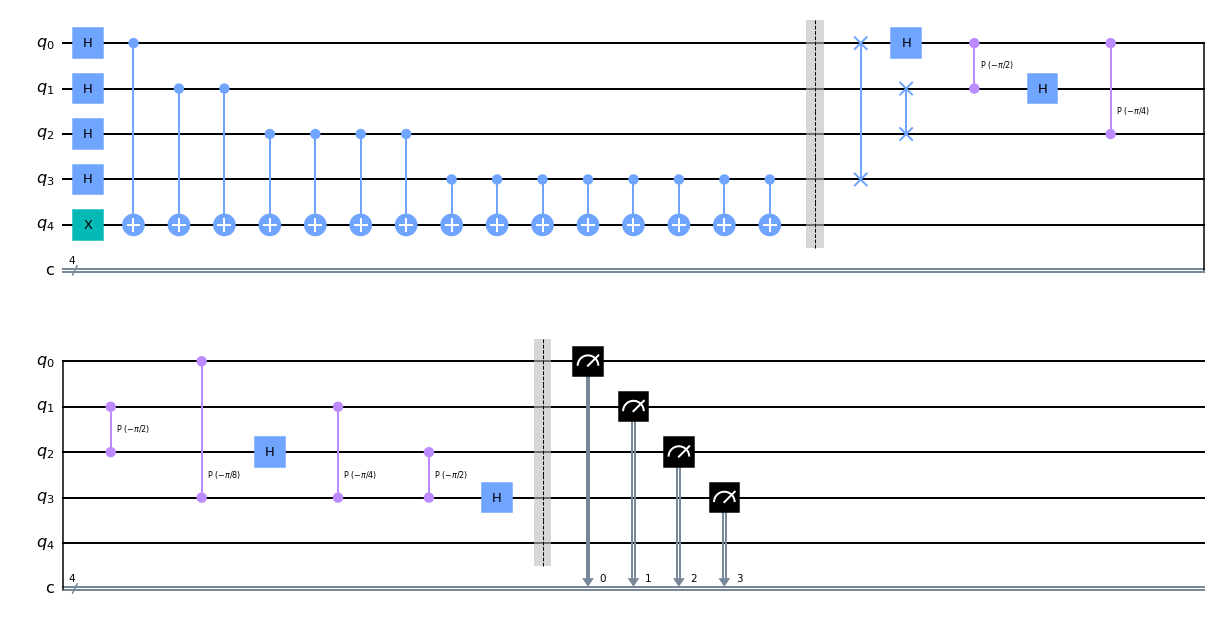

In [3]:
n4 = 5
n4_c = 4
qpe4 = QuantumCircuit(n4, n4_c)
# Apply H-Gates to counting qubits:
for qubit in range(n4_c):
    qpe4.h(qubit)

# Prepare our eigenstate |psi>:
qpe4.x(n4_c)

# Do the CNOT operations:
repetitions = 1
for counting_qubit in range(n4_c):
    for i in range(repetitions):
        qpe4.cx(counting_qubit, n4_c);
    repetitions *= 2

# Do the inverse QFT:
qpe4.barrier()
qft_dagger(qpe4, n4_c)


# Measure of course!
qpe4.barrier()
for m in range(n4_c):
    qpe4.measure(m,m)
qpe4.draw()

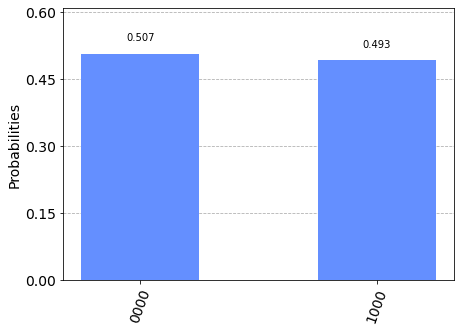

In [6]:
answer = obtain_measure(qpe4)
plot_histogram(answer)

# S Gate

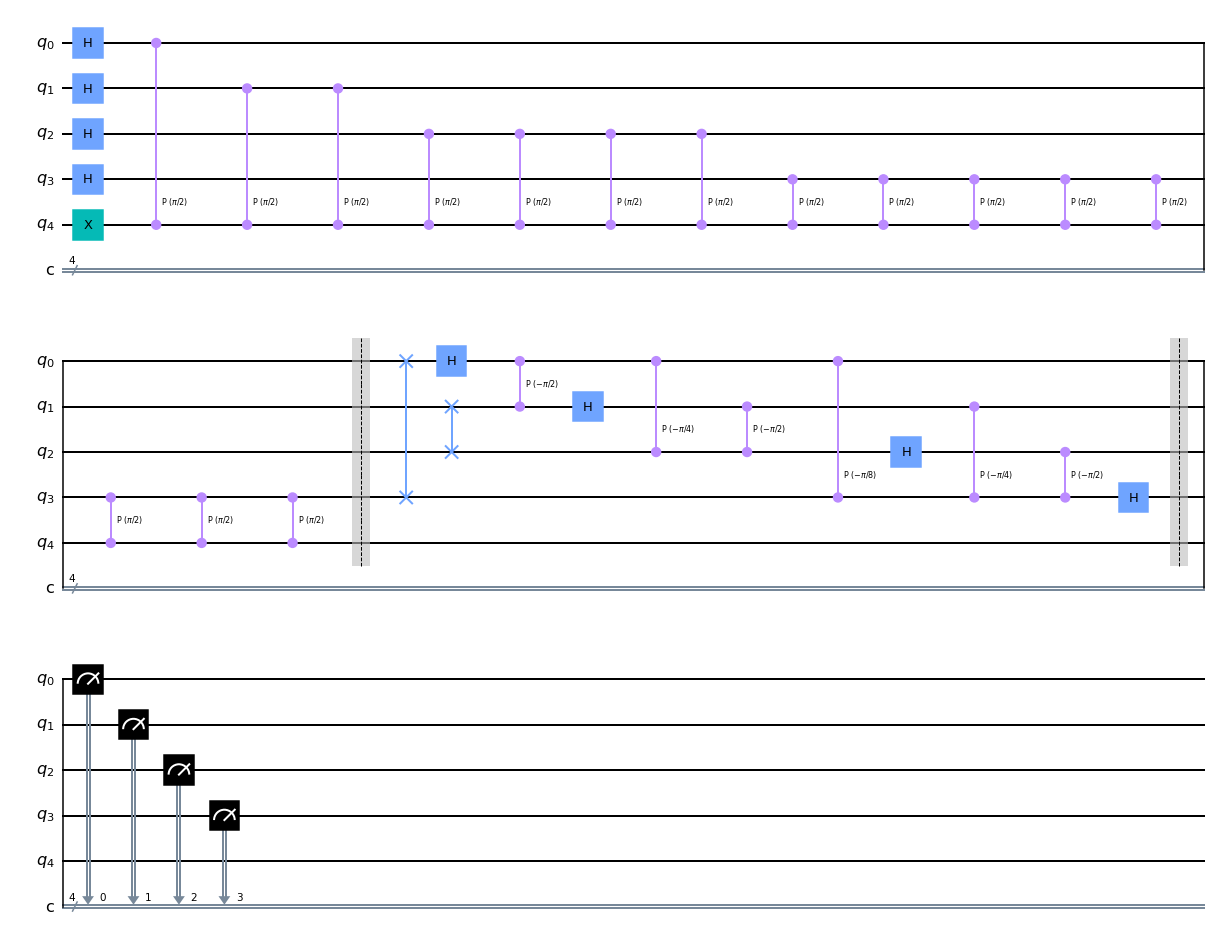

In [31]:
# Create and set up circuit
qpe5 = create_qpe(5, math.pi/2)
qpe5.draw()

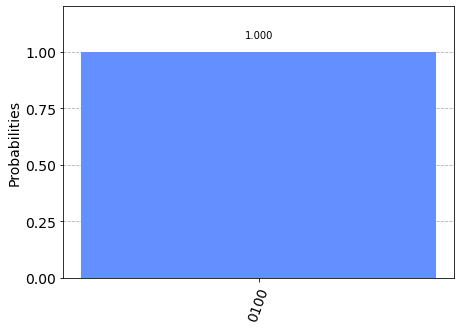

In [32]:
answer = obtain_measure(qpe5)
plot_histogram(answer)

# T Dagger Gate

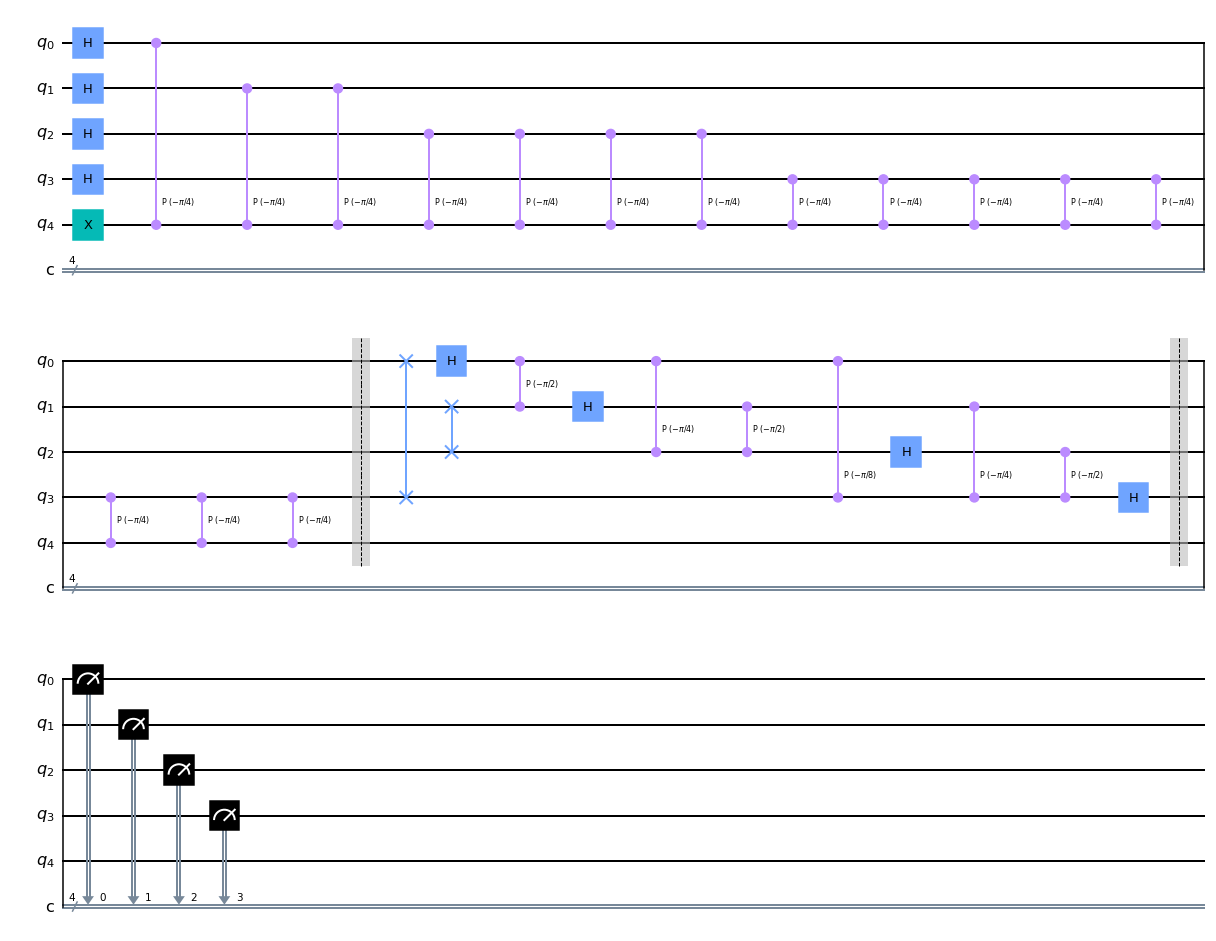

In [33]:
# Create and set up circuit
qpe6 = create_qpe(5, -math.pi/4)
qpe6.draw()

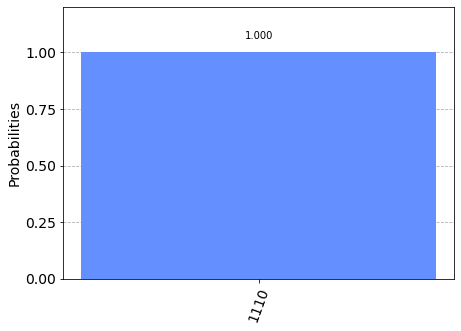

In [34]:
answer = obtain_measure(qpe6)
plot_histogram(answer)